# Name - Flynn Carneiro

### Task - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Dell\\Capstone Project'

In [3]:
os.chdir('C:\\Users\\Dell')

In [4]:
os.getcwd()

'C:\\Users\\Dell'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
iris=pd.read_csv("Iris_New.csv")

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris["Species"].unique()                            

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Since this is Unsupervised Learning model, the Target Variable should be dropped.

In [10]:
iris=iris.drop(columns=["Species"])

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Step 1

In [12]:
X=iris                                                   #Feature Variable

In [13]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Rules

In [14]:
X.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
X.shape

(150, 5)

In [17]:
X.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Step 2

### Here, since it is Unsupervised Learning Model, it doesn't have Target Variable. So we dont need to Split the dataset.

Step 3

In [18]:
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters=3)

In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
X_pred=kmeans.predict(X)

In [24]:
X_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

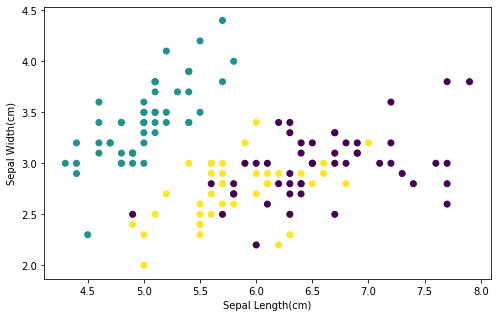

In [27]:
fig=plt.figure(figsize=(8,5))

plt.scatter(X["SepalLengthCm"],X["SepalWidthCm"],c=kmeans.fit_predict(X))        #C=color based on No of Clusters
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.show()

# To Check the Perfect value of K using 'Elbow Plot'

In [28]:
ks=[1,2,3,4,5,6]

In [29]:
inertia=[]

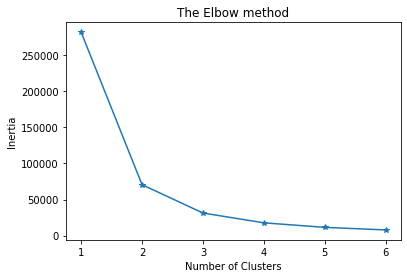

In [30]:
for k in ks:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(ks,inertia,marker="*")
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

### From this we choose the number of clusters(n_clusters) as 3.